<a href="https://colab.research.google.com/github/datacentertugaskuliah-coder/PraktikumDS/blob/main/Prediksi_Status_Kelulusan_Siswa_dengan_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== METADATA DATASET STUDENT PERFORMANCE ===
{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proce

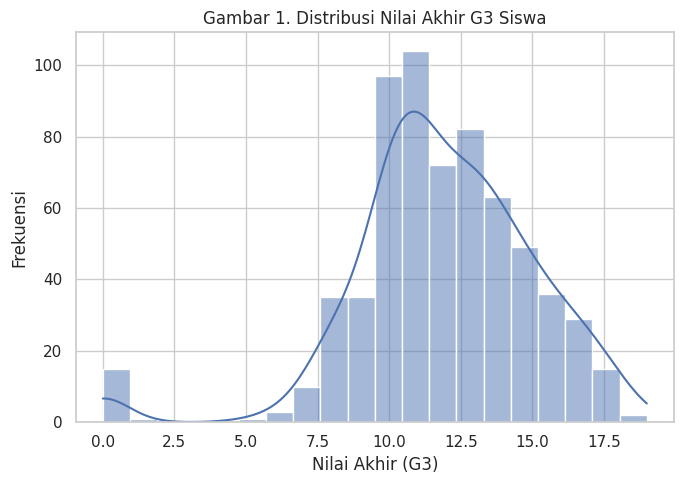

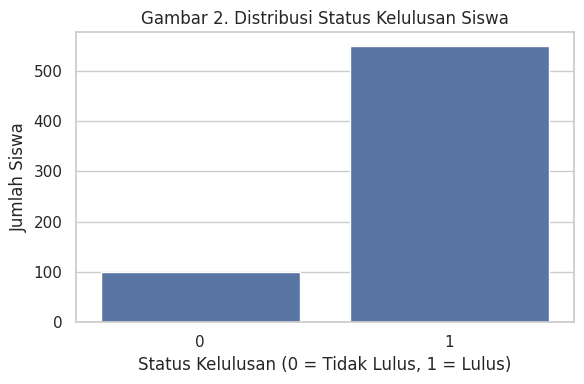

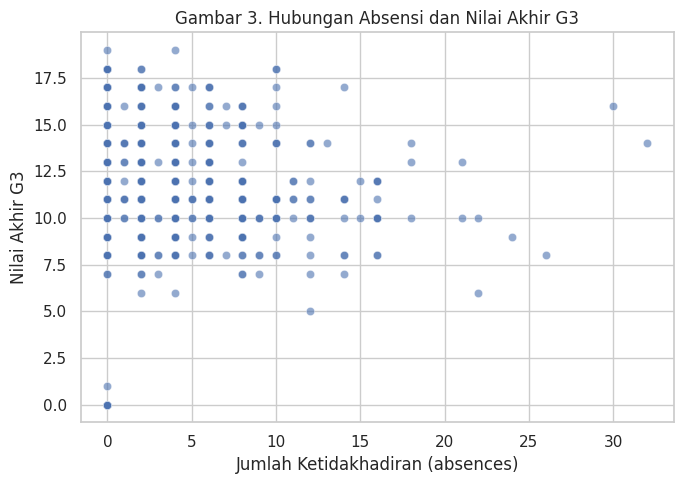

Fitur numerik   : ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Fitur kategorik : ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'] 

Ukuran data latih: (519, 30)
Ukuran data uji  : (130, 30) 

=== EVALUASI MODEL RANDOM FOREST ===
Akurasi pada data uji : 0.792
ROC AUC               : 0.660

Laporan klasifikasi:
                      precision    recall  f1-score   support

Berisiko Tidak Lulus      0.182     0.100     0.129        20
               Lulus      0.849     0.918     0.882       110

            accuracy                          0.792       130
           macro avg      0.515     0.509     0.506       130
        weighted avg      0.746     0.792     0.766       130

Confusion matrix:
[[  2  18]
 [  9 101]] 



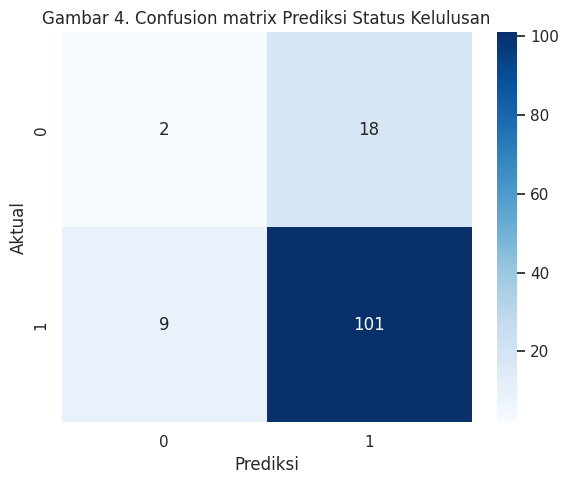

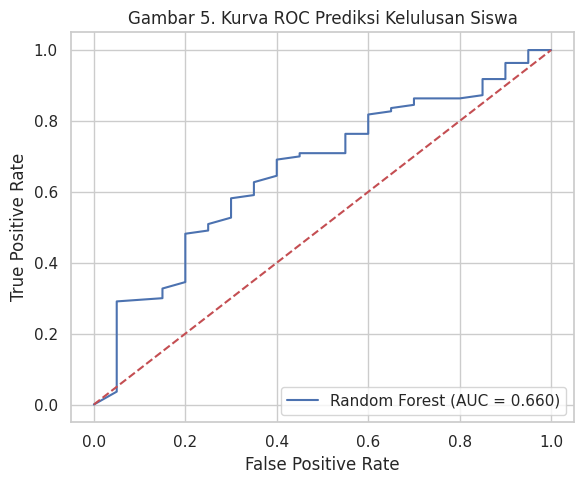

=== TABEL RINGKAS METRIK EVALUASI MODEL ===
    Metrik     Nilai
0  Akurasi  0.792308
1  ROC AUC  0.659545 

Beberapa fitur paling penting menurut Random Forest:
failures      0.084094
school_MS     0.070429
school_GP     0.058409
higher_no     0.043783
absences      0.043624
higher_yes    0.043185
Medu          0.037292
freetime      0.036089
Fedu          0.033309
famrel        0.033243
dtype: float64 



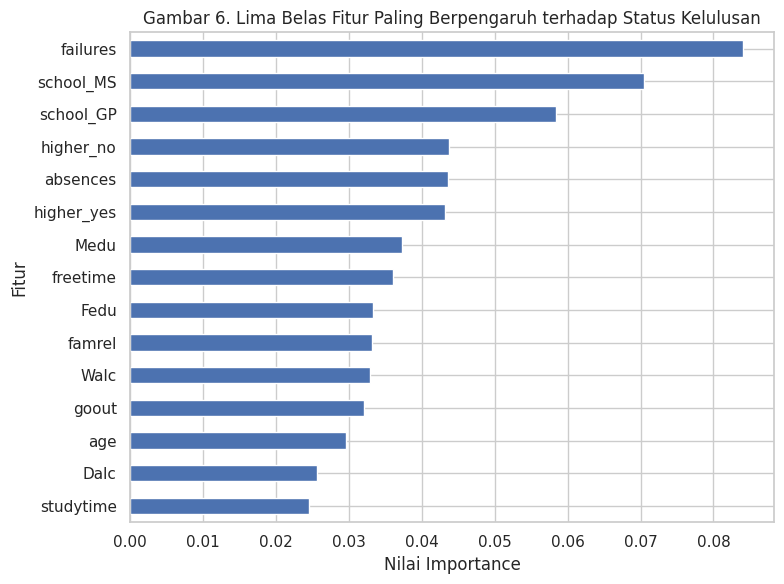

In [6]:
# ==========================================================
# Judul Program : Prediksi Status Kelulusan Siswa dengan Random Forest
# Buku         : Praktikum Data Science dan Machine Learning Berbasis Python dan UCI Repository
# Studi Kasus  : Student Performance – Prediksi Risiko Tidak Lulus
# Algoritma    : RandomForestClassifier (Klasifikasi Biner)
# Dataset      : Student Performance – UCI Machine Learning Repository (ID: 320)
# Link UCI     : https://archive.ics.uci.edu/dataset/320/student+performance
# Repo         : https://github.com/datacentertugaskuliah-coder/PraktikumDS.git
# Lingkungan   : Google Colab
# ==========================================================

# Instalasi pustaka untuk akses dataset UCI
!pip install ucimlrepo -q

# Tahap 1 – Import pustaka
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.0)

# ==========================================================
# Tahap 2 – Mengambil dataset Student Performance dari UCI
# ==========================================================

student = fetch_ucirepo(id=320)

# Fitur dan target dalam bentuk DataFrame
X_asli = student.data.features.copy()
y_all = student.data.targets.copy()

print("=== METADATA DATASET STUDENT PERFORMANCE ===")
print(student.metadata, "\n")

print("=== INFORMASI VARIABEL (CONTOH) ===")
print(student.variables.head(), "\n")

print("Nama kolom pada bagian target:")
print(y_all.columns, "\n")

# Di dataset ini, nilai akhir biasanya disimpan pada kolom 'G3'
if "G3" in y_all.columns:
    G3 = y_all["G3"]
else:
    # Jika namanya berbeda, gunakan kolom pertama target
    G3 = y_all.iloc[:, 0]
    print("Peringatan: Kolom 'G3' tidak ditemukan, menggunakan kolom target pertama.\n")

# ==========================================================
# Tahap 3 – Membentuk label kelulusan (biner)
# ==========================================================
# Skala nilai: 0–20. Ambang umum kelulusan = 10
# 1 = Lulus, 0 = Berisiko Tidak Lulus

y = (G3 >= 10).astype(int)

df = X_asli.copy()
df["G3"] = G3
df["status_lulus"] = y

print("Lima baris pertama data gabungan:")
print(df.head(), "\n")

print("Ukuran data (baris, kolom):", df.shape, "\n")

print("Distribusi status kelulusan (0 = tidak lulus / berisiko, 1 = lulus):")
print(df["status_lulus"].value_counts(), "\n")

print("Statistik deskriptif nilai akhir (G3):")
print(df["G3"].describe(), "\n")

# ==========================================================
# Tahap 4 – Visualisasi awal (EDA)
# ==========================================================

# Gambar 1 – Distribusi nilai akhir G3
plt.figure(figsize=(7, 5))
sns.histplot(df["G3"], bins=20, kde=True)
plt.title("Gambar 1. Distribusi Nilai Akhir G3 Siswa")
plt.xlabel("Nilai Akhir (G3)")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

# Gambar 2 – Distribusi status kelulusan
plt.figure(figsize=(6, 4))
sns.countplot(x="status_lulus", data=df)
plt.title("Gambar 2. Distribusi Status Kelulusan Siswa")
plt.xlabel("Status Kelulusan (0 = Tidak Lulus, 1 = Lulus)")
plt.ylabel("Jumlah Siswa")
plt.tight_layout()
plt.show()

# Contoh hubungan antara absensi (jika ada kolom 'absences') dan G3
if "absences" in df.columns:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x="absences", y="G3", data=df, alpha=0.6)
    plt.title("Gambar 3. Hubungan Absensi dan Nilai Akhir G3")
    plt.xlabel("Jumlah Ketidakhadiran (absences)")
    plt.ylabel("Nilai Akhir G3")
    plt.tight_layout()
    plt.show()

# ==========================================================
# Tahap 5 – Menyiapkan fitur dan target untuk pemodelan
# ==========================================================

X = X_asli  # hanya fitur asli, tanpa G3 dan status_lulus
y = df["status_lulus"]

fitur_numerik = X.select_dtypes(include=["int64", "float64"]).columns
fitur_kategorik = X.select_dtypes(include=["object"]).columns

print("Fitur numerik   :", list(fitur_numerik))
print("Fitur kategorik :", list(fitur_kategorik), "\n")

# Pra-pemrosesan: one hot encoding untuk fitur kategorik, numerik dilewatkan apa adanya
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), fitur_kategorik),
        ("num", "passthrough", fitur_numerik),
    ]
)

# ==========================================================
# Tahap 6 – Pemisahan data latih dan data uji
# ==========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji  :", X_test.shape, "\n")

# ==========================================================
# Tahap 7 – Membangun dan melatih model Random Forest
# ==========================================================

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", rf_model)
    ]
)

pipeline.fit(X_train, y_train)

# ==========================================================
# Tahap 8 – Evaluasi model
# ==========================================================

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

akurasi = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("=== EVALUASI MODEL RANDOM FOREST ===")
print(f"Akurasi pada data uji : {akurasi:.3f}")
print(f"ROC AUC               : {roc_auc:.3f}\n")

print("Laporan klasifikasi:")
print(classification_report(
    y_test,
    y_pred,
    digits=3,
    target_names=["Berisiko Tidak Lulus", "Lulus"]
))

print("Confusion matrix:")
print(cm, "\n")

# Gambar 4 – Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Gambar 4. Confusion matrix Prediksi Status Kelulusan")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

# Gambar 5 – Kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "r--")
plt.title("Gambar 5. Kurva ROC Prediksi Kelulusan Siswa")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ==========================================================
# Tahap 9 – Tabel ringkas metrik evaluasi
# ==========================================================

tabel_metrik = pd.DataFrame({
    "Metrik": ["Akurasi", "ROC AUC"],
    "Nilai": [akurasi, roc_auc]
})

print("=== TABEL RINGKAS METRIK EVALUASI MODEL ===")
print(tabel_metrik, "\n")

# ==========================================================
# Tahap 10 – Analisis pentingnya fitur (feature importance)
# ==========================================================

# Mengambil nama fitur hasil transformasi
preproses_terlatih = pipeline.named_steps["preprocess"]
ohe = preproses_terlatih.named_transformers_["cat"]
nama_fitur_kat = ohe.get_feature_names_out(fitur_kategorik)
nama_fitur_num = fitur_numerik
nama_fitur_lengkap = np.concatenate([nama_fitur_kat, nama_fitur_num])

rf_terlatih = pipeline.named_steps["model"]
importance = pd.Series(rf_terlatih.feature_importances_, index=nama_fitur_lengkap)
importance_urut = importance.sort_values(ascending=True)

print("Beberapa fitur paling penting menurut Random Forest:")
print(importance_urut.sort_values(ascending=False).head(10), "\n")

# Gambar 6 – Diagram batang fitur paling penting
plt.figure(figsize=(8, 6))
importance_urut.tail(15).plot(kind="barh")
plt.title("Gambar 6. Lima Belas Fitur Paling Berpengaruh terhadap Status Kelulusan")
plt.xlabel("Nilai Importance")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()
